In [1]:
import numpy as np

In [2]:
def distance(p1,p2):
    '''Find a distance between p1 and p2.'''
    return np.sqrt(np.sum(np.power((p1-p2),2)))

In [3]:
p1 = np.array([1,1])
p2 = np.array([4,4])

In [4]:
distance(p1,p2)

4.242640687119285

In [5]:
from collections import Counter

def majority_vote(votes):
    '''
    Return the most common element in votes.
    '''
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    return vote_counts

In [6]:
votes = [1,2,3,1,2,3,1,2,3,3,3]

In [7]:
vote_counts = majority_vote(votes)

In [8]:
vote_counts

{1: 3, 2: 3, 3: 5}

In [9]:
max_counts = max(vote_counts.values())
winners = []
for vote,count in vote_counts.items():
    if count == max_counts:
        winners.append(vote)

In [10]:
winners

[3]

In [11]:
import random
def majority_vote(votes):
    '''
    Return the most common element in votes.
    '''
    vote_counts = Counter(votes)
    
    max_counts = max(vote_counts.values())
    winners = []
    for vote,count in vote_counts.items():
        if count == max_counts:
            winners.append(vote)
    return random.choice(winners)

In [12]:
votes = [1,1,1,1,3,3,3,3,2,2]
winner = majority_vote(votes)

In [13]:
winner

1

In [14]:
import scipy.stats as ss
def majority_vote_short(votes):
    '''
    Return the most common element in votes.
    '''
    mode, count = ss.mstats.mode(votes)
    return mode

In [15]:
votes = [1,1,1,1,3,3,3,3,2,2]
majority_vote_short(votes)

array([1.])

In [16]:
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])

In [17]:
points

array([[1, 1],
       [1, 2],
       [1, 3],
       [2, 1],
       [2, 2],
       [2, 3],
       [3, 1],
       [3, 2],
       [3, 3]])

In [18]:
p = np.array([2.5, 2])

In [19]:
import matplotlib.pyplot as plt

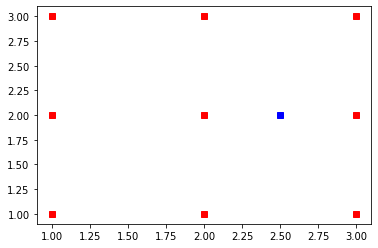

In [20]:
plt.plot(points[:,0], points[:,1], "rs");
plt.plot(p[0], p[1], "bs");

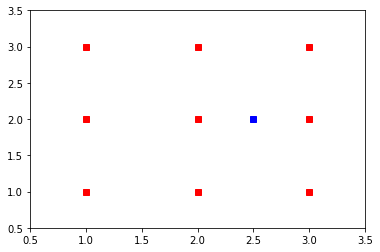

In [21]:
plt.plot(points[:,0], points[:,1], "rs");
plt.plot(p[0], p[1], "bs");
plt.axis([0.5, 3.5, 0.5, 3.5]);

In [22]:
distances = np.zeros(points.shape[0])
for i in range(len(distances)):
    distances[i] = distance(p, points[i])

In [23]:
distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [24]:
ind = np.argsort(distances)
distances[ind]

array([0.5       , 0.5       , 1.11803399, 1.11803399, 1.11803399,
       1.11803399, 1.5       , 1.80277564, 1.80277564])

In [25]:
distances[ind[:2]]

array([0.5, 0.5])

In [26]:
def find_nearest_neighbors(p, points, k=5):
    """Find the k nearest neighbors of point p and return their indices."""
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

In [27]:
ind = find_nearest_neighbors(p, points, 2); print(points[ind])

[[2 2]
 [3 2]]


In [28]:
ind = find_nearest_neighbors(p, points, 3); print(points[ind])

[[2 2]
 [3 2]
 [2 1]]


In [29]:
ind = find_nearest_neighbors(p, points, 4); print(points[ind])

[[2 2]
 [3 2]
 [2 1]
 [2 3]]


In [30]:
def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote(outcomes[ind])

In [31]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])
knn_predict(np.array([1.0,2.7]), points, outcomes, 2)

0

In [32]:
knn_predict(np.array([2.5,2.7]), points, outcomes, 2)

1

In [33]:
np.concatenate((ss.norm(0,1).rvs((5,2)),ss.norm(1,1).rvs((5,2))), axis = 0)

array([[-0.74386803, -0.22843837],
       [ 0.26844654, -0.54150701],
       [ 0.58818359,  0.68611588],
       [ 1.49545233,  0.73271549],
       [-1.44380092,  0.42027751],
       [ 0.75083073,  0.58456598],
       [ 0.2079555 ,  2.19251738],
       [ 1.51404193,  0.91045981],
       [ 1.79619848, -1.22701694],
       [ 2.34665244,  2.36544682]])

In [34]:
n = 5 
np.concatenate((np.repeat(0,n), np.repeat(1,n)))

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [35]:
def generate_synth_data(n = 50):
    '''Create 2 sets of points from bivariate normal distributions.'''
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0,n), np.repeat(1,n)))
    return (points, outcomes)

In [36]:
n = 20
(points, outcomes) = generate_synth_data(n)

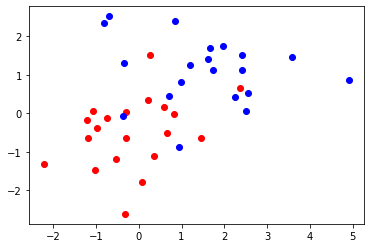

In [37]:
plt.figure()
plt.plot(points[:n,0],points[:n,1],"ro");
plt.plot(points[n:,0],points[n:,1],"bo");
plt.savefig("bivardata.pdf")

In [38]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    '''Classify each point on the prediction grid.'''
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs,ys)
    
    prediction_grid = np.zeros(xx.shape)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    return (xx, yy, prediction_grid)

In [39]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

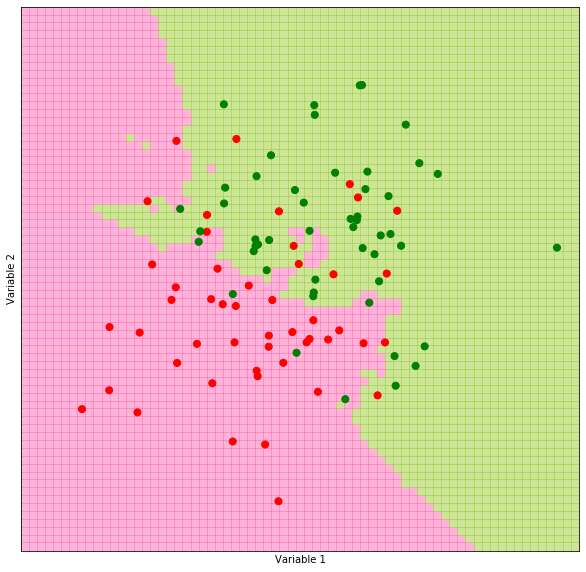

In [40]:
(predictors, outcomes) = generate_synth_data()
k = 5; filename = "knn_synth_5.pdf"; limits = (-3, 4, -3, 4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid (xx, yy, prediction_grid, filename)

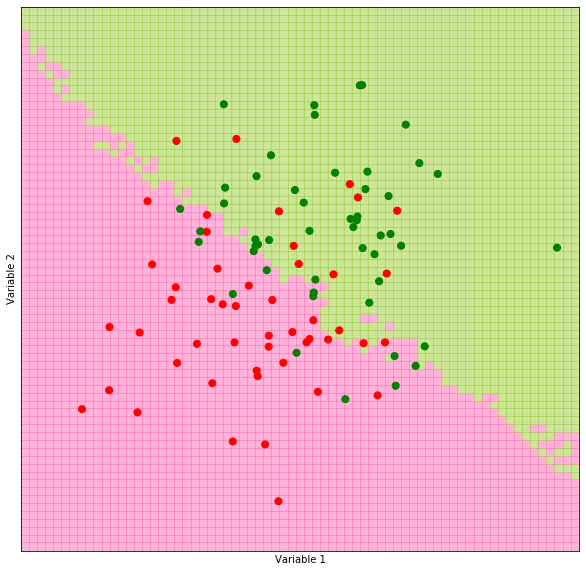

In [41]:
k = 50; filename = "knn_synth_50.pdf"; limits = (-3, 4, -3, 4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid (xx, yy, prediction_grid, filename)

In [42]:
from sklearn import datasets

In [43]:
iris = datasets.load_iris()

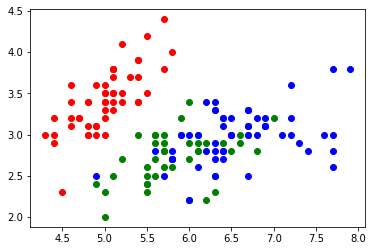

In [44]:
predictors = iris.data[:,0:2]
outcomes = iris.target
plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1], "ro");
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==1][:,1], "go");
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==2][:,1], "bo");
plt.savefig("iris.pdf")

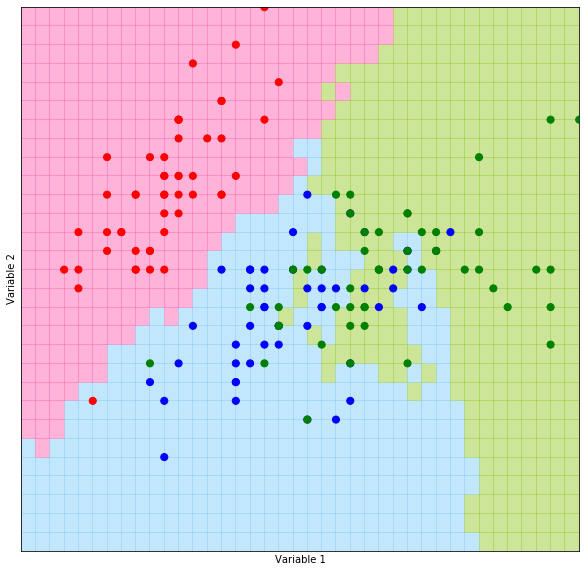

In [45]:
k = 5; filename = "iris_grid.pdf"; limits = (4, 8, 1.5, 4.5); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid (xx, yy, prediction_grid, filename)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

In [47]:
sk_predictions.shape

(150,)

In [48]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

In [49]:
my_predictions.shape

(150,)

In [50]:
np.mean(sk_predictions == my_predictions) * 100

96.0

In [51]:
print(np.mean(sk_predictions == outcomes) * 100)
print(np.mean(my_predictions == outcomes) * 100)

83.33333333333334
84.66666666666667
